In [7]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv('regression.csv')

In [4]:
df

,date,seizure,HK_exports_to_Korea_logdiff
0,2001-02-01,5830.0,NaN
1,2001-03-01,4035.0,0.023309
2,2001-04-01,3636.0,-0.014729
3,2001-05-01,42145.0,-0.017692
4,2001-06-01,2973.0,-0.151941
...,...,...,...
288,2025-02-01,22929.0,-0.226862
289,2025-03-01,15695.0,0.062489
290,2025-04-01,33653.0,-0.071124
291,2025-05-01,3346.0,-0.035947


In [5]:
df['seizure_log'] = np.log(df['seizure'])

In [6]:
df

,date,seizure,HK_exports_to_Korea_logdiff,seizure_log
0,2001-02-01,5830.0,NaN,8.670772
1,2001-03-01,4035.0,0.023309,8.302762
2,2001-04-01,3636.0,-0.014729,8.198639
3,2001-05-01,42145.0,-0.017692,10.648871
4,2001-06-01,2973.0,-0.151941,7.997327
...,...,...,...,...
288,2025-02-01,22929.0,-0.226862,10.040158
289,2025-03-01,15695.0,0.062489,9.661097
290,2025-04-01,33653.0,-0.071124,10.423857
291,2025-05-01,3346.0,-0.035947,8.115521


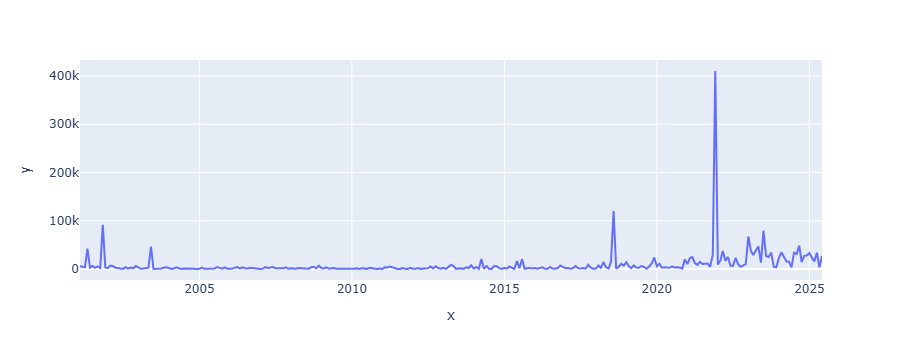

In [21]:
px.line(x=df['date'],y=df['seizure'])

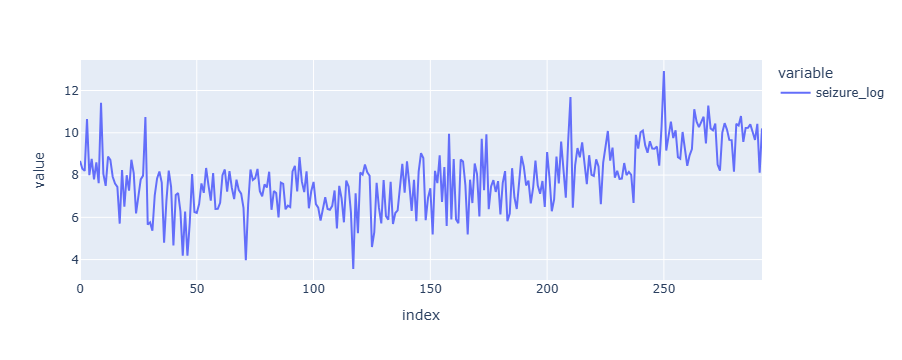

In [11]:
px.line(df['seizure_log'])

In [16]:
df['seizure_diff'] = df['seizure'].diff()

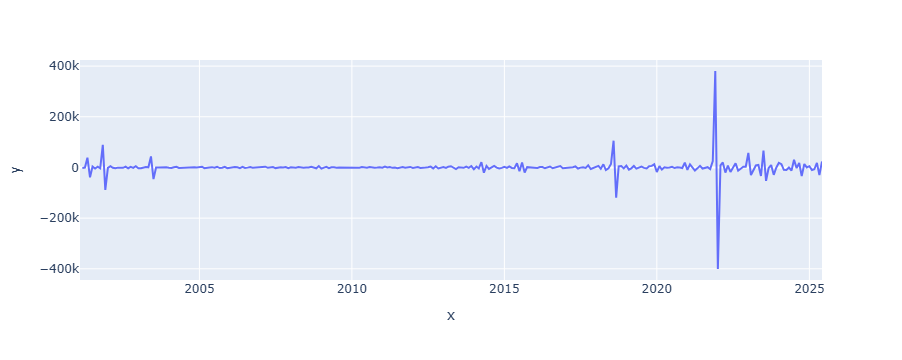

In [18]:
px.line(x=df['date'], y=df['seizure_diff'])

In [20]:
df.loc[df['date']=='2023-02-01']

,date,seizure,HK_exports_to_Korea_logdiff,seizure_log,seizure_diff
264,2023-02-01,37372.0,0.198316,10.528677,-29943.0


In [24]:
from statsmodels.tsa.stattools import adfuller
col='seizure_diff'
result = adfuller(df[col].iloc[1:])
print(f'Column: {col}')
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')
print()

Column: seizure_diff
Test statistic: -8.420060302230098
p-value: 1.9947378606973555e-13
The time series is stationary



In [25]:
from statsmodels.tsa.stattools import adfuller
col='seizure_log'
result = adfuller(df[col].iloc[1:])
print(f'Column: {col}')
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print('The time series is stationary')
else:
    print('The time series is non-stationary')
print()

Column: seizure_log
Test statistic: -1.6479331676700506
p-value: 0.4581185608730337
The time series is non-stationary



           date      seizure  HK_exports_to_Korea_logdiff  seizure_log  \
250  2021-12-01  8776.215017                     0.102139    12.924534   

     seizure_diff  
250      380665.0  


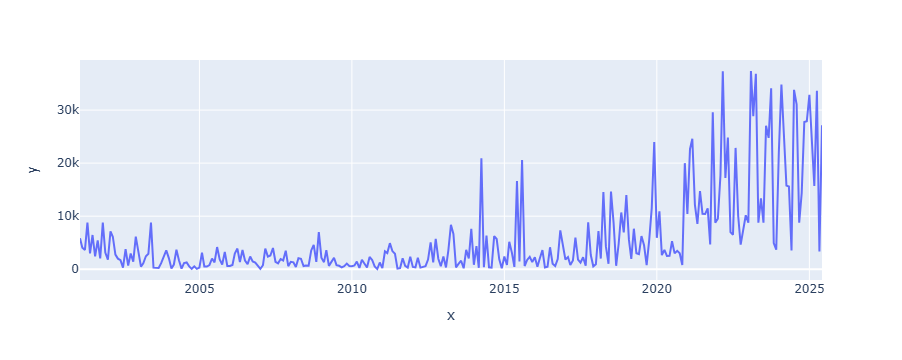

In [39]:
df1 = df.copy()
df1.loc[df1['seizure'] > 40000, 'seizure'] = np.mean(df1['seizure'])
print(df1.loc[df1['date']=='2021-12-01'])
px.line(x=df1['date'],y=df1['seizure'])

In [42]:
# 로그까지 할 필욘 없어 보임. 추세가 뚜렷하지 않음
df.drop(columns=['seizure', 'seizure_log'], inplace=True)

In [43]:
df

,date,HK_exports_to_Korea_logdiff,seizure_diff
0,2001-02-01,NaN,NaN
1,2001-03-01,0.023309,-1795.0
2,2001-04-01,-0.014729,-399.0
3,2001-05-01,-0.017692,38509.0
4,2001-06-01,-0.151941,-39172.0
...,...,...,...
288,2025-02-01,-0.226862,-9954.0
289,2025-03-01,0.062489,-7234.0
290,2025-04-01,-0.071124,17958.0
291,2025-05-01,-0.035947,-30307.0


In [48]:
# 독립변수 변환 반영
df.to_csv('regression.csv', index=False)

In [49]:
df2 = pd.read_csv('regression.csv')
df2

,date,HK_exports_to_Korea_logdiff,seizure_diff
0,2001-02-01,NaN,NaN
1,2001-03-01,0.023309,-1795.0
2,2001-04-01,-0.014729,-399.0
3,2001-05-01,-0.017692,38509.0
4,2001-06-01,-0.151941,-39172.0
...,...,...,...
288,2025-02-01,-0.226862,-9954.0
289,2025-03-01,0.062489,-7234.0
290,2025-04-01,-0.071124,17958.0
291,2025-05-01,-0.035947,-30307.0
